In [21]:
import pandas as pd
from pathlib import Path
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [22]:
import matplotlib
fontsize = 14
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [23]:
def load_systems_dataframe(ulx_only=False, beamed=False, half_opening_l_45=False):
    systems_df_path = Path('../data/processed/all_systems_df.csv')
    df = pd.read_csv(systems_df_path)
    if ulx_only:
        df = df[df['Lx'] > 1E39]
    if beamed:
        df = df[df['b'] < 1]
    if half_opening_l_45:
        df = df[df['theta_half_deg'] < 45]
        
    df = df.drop(['Unnamed: 0'], axis=1)
    return df

In [24]:
systems_df = load_systems_dataframe(True, True, True)

In [25]:
systems_df

,mdot,m,Z,tage,is_bh,mdot_gs,LEdd,MEdd,mdot_ratio,XLsph,...,r_isco_nospin,r_isco,r_sph,r_out,P_inflow_at_rsph,P_envelope,P_wind,P_inflow_days,P_envelope_days,P_wind_days
3,36.00,24.6,0.0002,10,1,2.268994e+21,2.952000e+39,3.936000e+19,57.647201,9.090313e+41,...,6.0,6,345.883207,6.561990e+04,1.229021e+03,4.423554e+07,3.854791e+09,0.014225,5.119854e+02,4.461564e+04
27,11.00,24.6,0.0002,10,1,6.933037e+20,2.952000e+39,3.936000e+19,17.614423,6.496234e+40,...,6.0,6,105.686536,4.391670e+03,4.382400e+01,7.567147e+04,1.623069e+06,0.000507,8.758272e-01,1.878552e+01
28,26.00,8.2,0.0002,10,1,1.638718e+21,9.840000e+38,1.312000e+19,124.902269,1.640068e+42,...,6.0,6,749.413616,3.040184e+05,3.600274e+03,5.925052e+08,1.097213e+11,0.041670,6.857699e+03,1.269923e+06
37,430.00,22.7,0.0002,10,1,2.710187e+22,2.724000e+39,3.632000e+19,746.196885,2.117506e+44,...,6.0,6,4477.181310,1.081385e+07,1.582409e+06,9.231461e+12,1.028067e+16,18.314923,1.068456e+08,1.189892e+11
40,9.50,13.8,0.0002,10,1,5.987623e+20,1.656000e+39,2.208000e+19,27.117856,9.600644e+40,...,6.0,6,162.707137,1.545581e+04,8.301593e+01,7.490860e+05,3.342826e+07,0.000961,8.669977e+00,3.869012e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,1.20,1.3,0.0020,100,0,7.563313e+19,1.560000e+38,2.080000e+18,36.362081,1.737040e+40,...,6.0,6,218.172485,2.679876e+04,1.778998e+03,2.684140e+07,1.531714e+09,0.020590,3.106643e+02,1.772817e+04
2937,0.72,1.3,0.0020,100,0,4.537988e+19,1.560000e+38,2.080000e+18,21.817248,5.557936e+39,...,6.0,6,130.903491,8.344963e+03,4.230791e+02,1.719364e+06,5.362503e+07,0.004897,1.990005e+01,6.206600e+02
3796,0.54,1.3,0.0002,200,0,3.403491e+19,1.560000e+38,2.080000e+18,16.362936,2.906046e+39,...,6.0,6,98.177618,3.520531e+03,1.875517e+02,2.411639e+05,4.558038e+06,0.002171,2.791249e+00,5.275507e+01
4073,1.30,1.3,0.0002,200,0,8.193589e+19,1.560000e+38,2.080000e+18,39.392254,2.074132e+40,...,6.0,6,236.353525,3.124718e+04,2.227027e+03,3.892450e+07,2.384751e+09,0.025776,4.505151e+02,2.760129e+04


In [26]:
res_df = pd.read_csv('../data/processed/curve_classications.csv')

In [27]:
res_df

,system_id,theta,dincl,inclination,lc_min,lc_max,N_lim,classification
0,3,12.03,0,0,22.130920,22.130920,0.032583,alive
1,3,12.03,0,1,22.416954,22.416954,0.032583,alive
2,3,12.03,0,2,22.629745,22.629745,0.032583,alive
3,3,12.03,0,3,22.745117,22.745117,0.032583,alive
4,3,12.03,0,4,22.950842,22.950842,0.032583,alive
...,...,...,...,...,...,...,...,...
514873,17261,4.58,45,86,0.000004,0.474002,0.320879,transient
514874,17261,4.58,45,87,0.000004,0.447798,0.320879,transient
514875,17261,4.58,45,88,0.000004,0.410134,0.320879,transient
514876,17261,4.58,45,89,0.000004,0.387256,0.320879,transient


In [28]:
df_a = res_df[res_df['classification']=='alive']
df_t = res_df[res_df['classification']=='transient']
df_d = res_df[res_df['classification']=='dead']

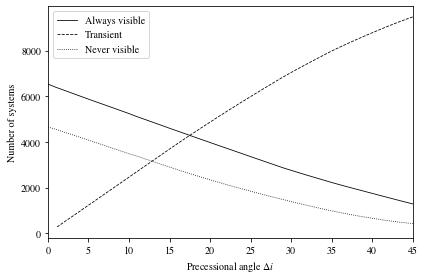

In [29]:
plt.figure(figsize=(6,4))
df_a['dincl'].value_counts().plot(label='Always visible', linestyle='-', color='black', linewidth=0.8)
df_t['dincl'].value_counts().plot(label='Transient', linestyle='--', color='black', linewidth=0.8)
df_d['dincl'].value_counts().plot(label='Never visible', linestyle='dotted', color='black', linewidth=0.8)
plt.xlim(0,45)

plt.xlabel(r'Precessional angle $\Delta i$')
plt.ylabel(r'Number of systems')

plt.legend()
plt.tight_layout()
#plt.savefig('../reports/figures/dincl_vs_number_of_systems.eps')
#plt.savefig('../reports/figures/dincl_vs_number_of_systems.pdf')
plt.savefig('../reports/figures/dincl_vs_number_of_systems.png')


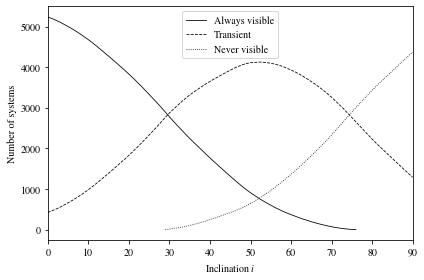

In [30]:
plt.figure(figsize=(6,4))
df_a['inclination'].value_counts().sort_index().plot(label='Always visible', linestyle='-', color='black', linewidth=0.8)
df_t['inclination'].value_counts().sort_index().plot(label='Transient', linestyle='--', color='black', linewidth=0.8)
df_d['inclination'].value_counts().sort_index().plot(label='Never visible', linestyle='dotted', color='black', linewidth=0.8)
plt.xlim(0,90)

plt.xlabel(r'Inclination $i$')
plt.ylabel(r'Number of systems')

plt.legend()
plt.tight_layout()
#plt.savefig('../reports/figures/inclination_vs_number_of_systems.eps')
#plt.savefig('../reports/figures/inclination_vs_number_of_systems.pdf')
plt.savefig('../reports/figures/inclination_vs_number_of_systems.png')


In [31]:
res_df['Z'] = res_df['system_id'].map(systems_df['Z'])
res_df['is_bh'] = res_df['system_id'].map(systems_df['is_bh'])


In [32]:
res_df

,system_id,theta,dincl,inclination,lc_min,lc_max,N_lim,classification,Z,is_bh
0,3,12.03,0,0,22.130920,22.130920,0.032583,alive,0.0002,1
1,3,12.03,0,1,22.416954,22.416954,0.032583,alive,0.0002,1
2,3,12.03,0,2,22.629745,22.629745,0.032583,alive,0.0002,1
3,3,12.03,0,3,22.745117,22.745117,0.032583,alive,0.0002,1
4,3,12.03,0,4,22.950842,22.950842,0.032583,alive,0.0002,1
...,...,...,...,...,...,...,...,...,...,...
514873,17261,4.58,45,86,0.000004,0.474002,0.320879,transient,0.0020,0
514874,17261,4.58,45,87,0.000004,0.447798,0.320879,transient,0.0020,0
514875,17261,4.58,45,88,0.000004,0.410134,0.320879,transient,0.0020,0
514876,17261,4.58,45,89,0.000004,0.387256,0.320879,transient,0.0020,0


In [48]:
piv1 = pd.pivot_table(res_df, columns=['is_bh'], index=['Z', 'classification'], aggfunc='count')
piv1 = piv1.sort_values(by='Z', ascending=False)
piv1 = piv1[piv1.columns[0:2]]

n_ns = piv1[piv1.columns[0]]
n_bh = piv1[piv1.columns[1]]

tot = n_ns+n_bh
piv1['%_NS'] = round(n_ns/tot*100, 2) 
piv1['%_BH'] = round(n_bh/tot*100, 2)
piv1['Total'] = tot

sum_total = piv1.sum()
n_ns_tot = sum_total[0]
n_bh_tot = sum_total[1]
sum_total['%_NS'] = round(n_ns_tot/(n_ns_tot + n_bh_tot)*100, 2) 
sum_total['%_BH'] = round(n_bh_tot/(n_ns_tot + n_bh_tot)*100, 2) 
sum_total = sum_total.rename(('SUM', ''))
piv1 = piv1.append(sum_total)

piv1[piv1.columns[0]] = piv1[piv1.columns[0]].astype('int32')
piv1[piv1.columns[1]] = piv1[piv1.columns[1]].astype('int32')
piv1[piv1.columns[4]] = piv1[piv1.columns[4]].astype('int32')

In [56]:
piv1

N_lim           %_NS   %_BH   Total
is_bh                       0       1                      
Z      classification                                      
0.02   alive             4101    1149  78.11  21.89    5250
       dead             13681     968  93.39   6.61   14649
       transient        15706    2069  88.36  11.64   17775
0.002  alive            14770   95942  13.34  86.66  110712
       dead             30977   31161  49.85  50.15   62138
       transient        42159  107313  28.21  71.79  149472
0.0002 alive             3179   53219   5.64  94.36   56398
       dead             10233   16542  38.22  61.78   26775
       transient        11704   60005  16.32  83.68   71709
SUM                    146510  368368  28.46  71.54  514878

In [36]:
print(piv1.to_latex())

\begin{tabular}{llrrrrr}
\toprule
    & {} & \multicolumn{2}{l}{N\_lim} &   \%\_NS &   \%\_BH &   Total \\
    & is\_bh &       0 & \multicolumn{4}{l}{1} \\
Z & classification &         &         &        &        &         \\
\midrule
0.02 & alive &    4101 &    1149 &  78.11 &  21.89 &    5250 \\
    & dead &   13681 &     968 &  93.39 &   6.61 &   14649 \\
    & transient &   15706 &    2069 &  88.36 &  11.64 &   17775 \\
0.002 & alive &   14770 &   95942 &  13.34 &  86.66 &  110712 \\
    & dead &   30977 &   31161 &  49.85 &  50.15 &   62138 \\
    & transient &   42159 &  107313 &  28.21 &  71.79 &  149472 \\
0.0002 & alive &    3179 &   53219 &   5.64 &  94.36 &   56398 \\
    & dead &   10233 &   16542 &  38.22 &  61.78 &   26775 \\
    & transient &   11704 &   60005 &  16.32 &  83.68 &   71709 \\
SUM &           &  146510 &  368368 &  28.46 &  71.54 &  514878 \\
\bottomrule
\end{tabular}



In [59]:
piv2 = pd.pivot_table(res_df, columns=['is_bh'], index=['classification'], aggfunc='count')
piv2 = piv2[piv2.columns[0:2]]
n_ns = piv2[piv2.columns[0]]
n_bh = piv2[piv2.columns[1]]

tot = n_ns+n_bh
piv2['%_NS'] = round(n_ns/tot*100, 2) 
piv2['%_BH'] = round(n_bh/tot*100, 2)
piv2['Total'] = tot
piv2

N_lim           %_NS   %_BH   Total
is_bh               0       1                      
classification                                     
alive           22050  150310  12.79  87.21  172360
dead            54891   48671  53.00  47.00  103562
transient       69569  169387  29.11  70.89  238956

In [58]:
piv2

N_lim           %_NS   %_BH   Total
is_bh               0       1                      
classification                                     
alive           22050  150310  12.79  87.21  172360
dead            54891   48671  53.00  47.00  103562
transient       69569  169387  29.11  70.89  238956

In [40]:
print(piv2.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} & \multicolumn{2}{l}{N\_lim} &   \%\_NS &   \%\_BH &   Total \\
is\_bh &      0 & \multicolumn{4}{l}{1} \\
classification &        &         &        &        &         \\
\midrule
alive          &  22050 &  150310 &  12.79 &  87.21 &  172360 \\
dead           &  54891 &   48671 &  53.00 &  47.00 &  103562 \\
transient      &  69569 &  169387 &  29.11 &  70.89 &  238956 \\
\bottomrule
\end{tabular}

